In [194]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

In [195]:
def scaleData(dataFrame,flag):
    df = dataFrame.copy()

    for var in df:
        mean = df[var].mean()
        std = df[var].std()
        l1 = (df[var].abs()).sum()

        if(flag == 1):
            df[var] = (df[var]-mean)/std
        else:
            df[var] = df[var]/l1

    return df


In [196]:
dfProbeA = pd.read_csv('./UKSA/probeA.csv', header = 0)
dfProbeB = pd.read_csv('./UKSA/probeB.csv', header = 0)
dfClassA = pd.read_csv('./UKSA/classA.csv', header = 0)

#print (dfProbeA)
#print (scDfProbeA)
#print (dfProbeB)
#print (dfClassA)

In [197]:
dfScProbeA = scaleData(dfProbeA,1)
dfScProbeA = dfScProbeA.drop('TNA', 1)

k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, dfScProbeA, np.ravel(dfClassA), cv=10, scoring='roc_auc')
    k_scores.append(scores.mean())
print(np.amax(k_scores))

0.894357910831


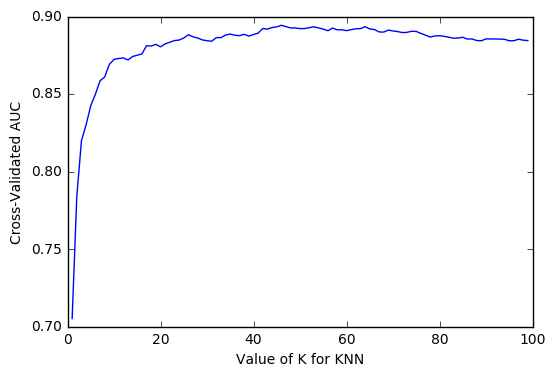

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')




In [183]:
def crossValidation(k,dataFrame, dataFrameTarget, order):
    #kf contains indices of instances in each fold - use KFold to split
    #kf = LeaveOneOut(n=1)
    #kf.split(dataFrame)
    strat = dataFrameTarget.as_matrix()
    kf = StratifiedKFold(np.ravel(strat), k)
    sum_accuracy = 0
    probArray = []
    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
    for train, test in kf:
        trainingDf = dataFrame.iloc[train].copy()
        testingDf = dataFrame.iloc[test].copy()
        trainingDfTarget = dataFrameTarget.iloc[train].copy()
        testingDfTarget = dataFrameTarget.iloc[test].copy()

        #training = training.drop(8, 1)
        
        #trainingDf = scaleData(trainingDf,1)
        #testingDf = scaleData(testingDf, 1)

        target = trainingDfTarget.as_matrix()
        training = trainingDf.as_matrix()
        testingTarget = testingDfTarget.as_matrix()
        testing = testingDf.as_matrix()
        target = target.squeeze()
        
        knn_model = KNeighborsClassifier(n_neighbors=order, weights='distance')
        knn_model.fit(training, target)
        
        predictVal = ((knn_model.predict(testing)))
        predictProb =  knn_model.predict_proba(testing)
        confusion = metrics.confusion_matrix(testingTarget, predictVal)
        #print (confusion)
        TP = confusion[1,1]
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        #print (TN/float(TN+FP))

        #print (metrics.recall_score(testingTarget, predictVal))
        y_pred_prob = knn_model.predict_proba(testing)[:, 1]
        
        auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
        #auccracy_score
        sum_accuracy = sum_accuracy + auc
        
        
    return sum_accuracy/k

In [184]:
#dfScProbeA = scaleData(dfProbeA, 1)
#print (crossValidation(5, dfProbeA, dfClassA, 1))
dfProbeA = dfProbeA.drop('TNA', 1)


In [191]:
max = 0
xTrue = 0
for index, x in enumerate(range(2, 80)):
    totalTemp = 0
    numberIter = 0
    suspectK = x
    for index2, i in enumerate(range(5, 6)):
        temp = crossValidation(i, dfScProbeA, dfClassA, x)
        totalTemp = totalTemp+temp
        numberIter = index2
    numberIter = numberIter+1
    print (x, numberIter, totalTemp/numberIter)
    if (totalTemp/numberIter) > max:
        max = totalTemp/numberIter
        xTrue = suspectK
    
print (xTrue, max)

2 1 0.78251615359
3 1 0.809993904532
4 1 0.823724729691
5 1 0.830477191337
6 1 0.84356602084
7 1 0.848739073939
8 1 0.855286562095
9 1 0.861595759387
10 1 0.863612587847
11 1 0.865682878741
12 1 0.866263674167
13 1 0.868056133912
14 1 0.868524210761
15 1 0.869643683076
16 1 0.873598677468
17 1 0.877738124866
18 1 0.875237395934
19 1 0.877769203901
20 1 0.877369247264
21 1 0.874641666744
22 1 0.876429339323
23 1 0.878585895593
24 1 0.879389569198
25 1 0.880309709533
26 1 0.881694133918
27 1 0.881099423446
28 1 0.880747362818
29 1 0.881021599026
30 1 0.882965841756
31 1 0.8829889273
32 1 0.883756371456
33 1 0.884396765978
34 1 0.883988359253
35 1 0.883616240826
36 1 0.883606634025
37 1 0.883539676614
38 1 0.884802565028
39 1 0.886311557188
40 1 0.888036726713
41 1 0.889103952157
42 1 0.887647850163
43 1 0.887240370836
44 1 0.887437935279
45 1 0.886697304527
46 1 0.887519777752
47 1 0.887440368434
48 1 0.887178145799
49 1 0.887171867083
50 1 0.888078070049
51 1 0.88834597275
52 1 0.887239

0.9


/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


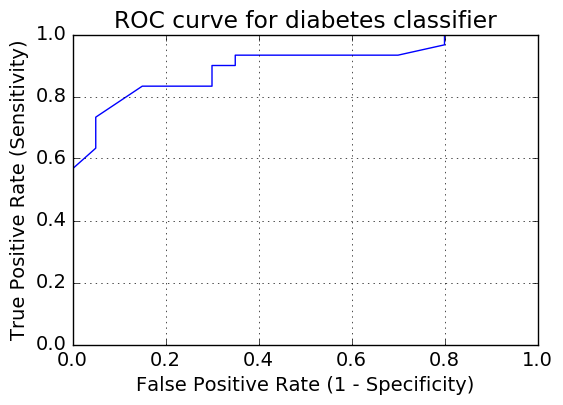

In [11]:
from sklearn.cross_validation import train_test_split
dfScProbeA = scaleData(dfProbeA, 1)
X_train, X_test, y_train, y_test = train_test_split(dfScProbeA, dfClassA, test_size = .05, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=47)
X_train = scaleData(X_train,1)
x_test = scaleData(X_test,1)

knn_model.fit(X_train, y_train)

predictVal = ((knn_model.predict(X_test)))
confusion = metrics.confusion_matrix(y_test, predictVal)
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
        
auc = (metrics.roc_auc_score(y_test, y_pred_prob))
print (auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [87]:
def crossValidationDtree(k,dataFrame, dataFrameTarget, order):
    #kf contains indices of instances in each fold - use KFold to split
    kf = KFold(len(dataFrame),k)
    sum_accuracy = 0
    probArray = []
    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
    for train, test in kf:
        trainingDf = dataFrame.iloc[train].copy()
        testingDf = dataFrame.iloc[test].copy()
        trainingDfTarget = dataFrameTarget.iloc[train].copy()
        testingDfTarget = dataFrameTarget.iloc[test].copy()

        #training = training.drop(8, 1)
        
        trainingDf = scaleData(trainingDf,1)
        testingDf = scaleData(testingDf, 1)

        target = trainingDfTarget.as_matrix()
        training = trainingDf.as_matrix()
        testingTarget = testingDfTarget.as_matrix()
        testing = testingDf.as_matrix()
        target = target.squeeze()
        
        knn_model = KNeighborsClassifier(n_neighbors=order)
        knn_model.fit(training, target)
        
        predictVal = ((knn_model.predict(testing)))
        predictProb =  knn_model.predict_proba(testing)
        confusion = metrics.confusion_matrix(testingTarget, predictVal)
        #print (confusion)
        TP = confusion[1,1]
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        #print (TN/float(TN+FP))

        #print (metrics.recall_score(testingTarget, predictVal))
        y_pred_prob = knn_model.predict_proba(testing)[:, 1]
        
        auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
        sum_accuracy = sum_accuracy + auc
        break
        
    return sum_accuracy/k

25 5


[[175  49]
 [ 37 239]]
0.823596014493


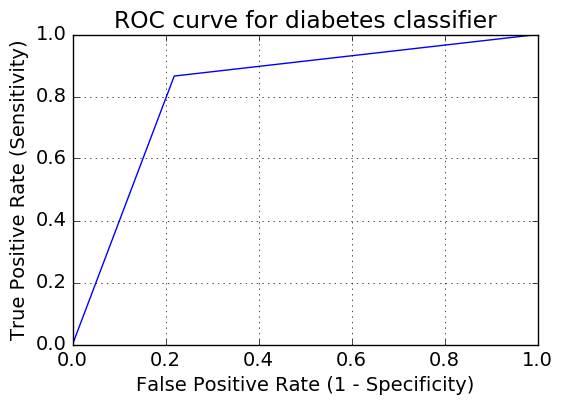

In [162]:
dTree = tree.DecisionTreeClassifier()
dTree.fit(X_train, y_train)

predictVal = dTree.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predictVal)
y_pred_prob = dTree.predict_proba(X_test)[:, 1]
print(confusion)
auc = (metrics.roc_auc_score(y_test, y_pred_prob))
print (auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)